# 데이터 분석 코드 필사 (2020.07.29)
### 원본: [EDA, Feature Engineering and model interpretation (by Andrew Lukyanenko)](https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation)
### 데이터 소스: [TMDB(The Movie DB)](https://www.themoviedb.org/)
### 순서
### [1. 문제 정의](#문제-정의)
### [2. 데이터 정의](#데이터-정의)
### [3. 데이터 전처리](#데이터-전처리)
### [4. 데이터 분석](#데이터-분석)
### [5. 모델링](#모델링)
***

# 문제 정의
* 영화 산업이 폭발적으로 성장하며, 영화 상영으로 인한 수익 또한 증가
* 현재까지 개봉한 수많은 영화들로부터 데이터를 수집해옴 (**TMDB**)


* 문제: 영화 정보들을 사용해 영화 **수익 예측**, 정말 영화 정보만을 사용해 정확한 수익 예측이 가능할 것인가?
* 훈련 데이터: 영화 정보와 수익 정보
* 테스트 데이터: 오직 영화 정보만
***

# 데이터 정의

### 데이터 불러오기

In [1]:
import pandas as pd

train_df = pd.read_csv("./DATA/train.csv")
test_df  = pd.read_csv("./DATA/test.csv")

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [2]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

* 결측 수

|변수 명              |훈련 데이터 결측|테스트 데이터 결측|
|:---                 |:---            |:---              |
|belongs_to_collection|2396            |0                 |
|genres               |7               |0                 |
|homepage             |2054            |2978              |
|overview             |8               |14                |
|poster_path          |1               |1                 |
|production_companies |156             |0                 |
|production_countries |55              |0                 |
|release_date         |0               |1                 |
|runtime              |2               |4                 |
|spoken_languages     |20              |0                 |
|status               |0               |2                 |
|tagline              |597             |863               |
|title                |0               |3                 |
|Keywords             |276             |0                 |
|cast                 |13              |0                 |
|crew                 |16              |0                 |

### 데이터 확인

In [3]:
train_df.shape, test_df.shape

((3000, 23), (4398, 22))

* 훈련 데이터가 **3000** 샘플, 테스트 데이터가 **4398** 샘플
* 테스트 데이터가 더 많음!

***
# 데이터 전처리

### (1) belongs_to_collection

In [4]:
train_df["belongs_to_collection"].head()

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: belongs_to_collection, dtype: object

* belongs_to_collection 변수의 경우 리스트에 딕셔너리가 들어있는 자료 형
* 그런데 결측의 경우 딕셔너리가 아닌 **NaN**으로 채워져 있음
* 딕셔너리 형 변수의 NaN을 **{}**로 바꿔줘야 편함

##### 딕셔너리 형 변수의 NaN을 { }로 변환

In [5]:
train_df["belongs_to_collection"].apply(lambda x: {} if pd.isna(x) else x)[0]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

* 위 코드처럼 짜면 리스트([ ])가 아닌 문자열(" ") 형태로 저장

In [6]:
import ast

dict_columns = ["belongs_to_collection", "genres", "production_companies", "production_countries", "spoken_languages", "Keywords",\
                "cast", "crew"]

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))    
    return df

train_df = text_to_dict(train_df)
test_df  = text_to_dict( test_df)

train_df["belongs_to_collection"].head()

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                   {}
3                                                   {}
4                                                   {}
Name: belongs_to_collection, dtype: object

In [7]:
train_df["belongs_to_collection"][0]

[{'id': 313576,
  'name': 'Hot Tub Time Machine Collection',
  'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg',
  'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]

* ast 패키지를 사용해서 **ast.literal_eval()** 함수를 사용하면 **리스트 형태로 저장**
* 나중에 필요한 정보를 리스트에서 추출하기 쉬워짐

##### 정보 추출해 시리즈 이름, 시리즈 여부로 저장

In [8]:
train_df["collection_name"] = train_df["belongs_to_collection"].apply(lambda x: x[0]["name"] if x != {} else 0)
train_df["has_collection"]  = train_df["belongs_to_collection"].apply(lambda x: len(x) if x != {} else 0)

test_df["collection_name"] = test_df["belongs_to_collection"].apply(lambda x: x[0]["name"] if x != {} else 0)
test_df["has_collection"]  = test_df["belongs_to_collection"].apply(lambda x: len(x) if x != {} else 0)

train_df = train_df.drop(["belongs_to_collection"], axis = 1)
test_df  =  test_df.drop(["belongs_to_collection"], axis = 1)

train_df.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,collection_name,has_collection
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,1
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,1
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,0


### (2) Genres

In [9]:
train_df["genres"].head()

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
Name: genres, dtype: object

##### 몇 개의 장르로 분류되었는지 확인

In [10]:
train_df["genres"].apply(lambda x: len(x) if x != {} else 0)

0       1
1       4
2       1
3       2
4       2
       ..
2995    2
2996    2
2997    4
2998    2
2999    3
Name: genres, Length: 3000, dtype: int64

In [11]:
train_df["genres"].apply(lambda x: len(x) if x != {} else 0).value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

* 대부분의 영화가 **2~3 개의 장르**를 포함
* 0, 7 개의 장르를 포함하는 것은 드물게 나타남

##### 각 영화의 장르 이름들만 추출

In [12]:
list_of_genres = list(train_df["genres"].apply(lambda x: [i["name"] for i in x] if x != {} else []).values)

list_of_genres

[['Comedy'],
 ['Comedy', 'Drama', 'Family', 'Romance'],
 ['Drama'],
 ['Thriller', 'Drama'],
 ['Action', 'Thriller'],
 ['Animation', 'Adventure', 'Family'],
 ['Horror', 'Thriller'],
 ['Documentary'],
 ['Action', 'Comedy', 'Music', 'Family', 'Adventure'],
 ['Comedy', 'Music'],
 ['Drama'],
 ['Comedy'],
 ['Drama'],
 ['Comedy', 'Crime'],
 ['Action', 'Thriller', 'Science Fiction', 'Mystery'],
 ['Action', 'Crime', 'Drama'],
 ['Horror', 'Thriller'],
 ['Drama', 'Romance'],
 ['Comedy', 'Romance'],
 ['Action', 'Thriller', 'Crime'],
 ['Adventure', 'Family', 'Science Fiction'],
 ['Horror', 'Thriller'],
 ['Thriller', 'Horror'],
 ['Thriller', 'Mystery', 'Foreign'],
 ['Horror', 'Comedy'],
 ['Comedy', 'Horror', 'Mystery', 'Thriller'],
 ['Crime', 'Drama', 'Mystery', 'Thriller'],
 ['Drama', 'Comedy', 'Romance'],
 ['Animation'],
 ['Action', 'Adventure', 'Crime', 'Thriller'],
 ['Drama', 'Comedy'],
 ['Mystery', 'Drama', 'Thriller'],
 ['Fantasy', 'Action', 'Adventure'],
 ['Horror'],
 ['Action', 'Comedy', 'Cr

##### 장르의 단어 구름 생성

In [13]:
text = " ".join([i for j in list_of_genres for i in j]) # 리스트를 문자열로, 단 단어 사이를 " "로 나눔
text

'Comedy Comedy Drama Family Romance Drama Thriller Drama Action Thriller Animation Adventure Family Horror Thriller Documentary Action Comedy Music Family Adventure Comedy Music Drama Comedy Drama Comedy Crime Action Thriller Science Fiction Mystery Action Crime Drama Horror Thriller Drama Romance Comedy Romance Action Thriller Crime Adventure Family Science Fiction Horror Thriller Thriller Horror Thriller Mystery Foreign Horror Comedy Comedy Horror Mystery Thriller Crime Drama Mystery Thriller Drama Comedy Romance Animation Action Adventure Crime Thriller Drama Comedy Mystery Drama Thriller Fantasy Action Adventure Horror Action Comedy Crime Thriller Action Crime Thriller Comedy Romance Action Drama Science Fiction Thriller Thriller War Western Action Documentary Crime Drama Comedy Drama Comedy Romance Crime Drama Mystery Romance Thriller Animation Family Comedy Adventure Crime Drama Mystery Western Drama Comedy Science Fiction Action Adventure Thriller Romance Drama Comedy Adventure 

(-0.5, 1199.5, 999.5, -0.5)

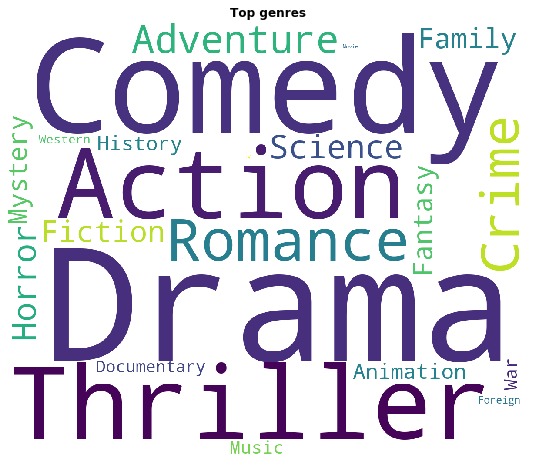

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize = (12, 8)) # figsize = (x, y)
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text) # collocations: 연어 처리, width / height: 그림 너비 / 높이
plt.imshow(word_cloud) # 2차원 그림 표출
plt.title("Top genres") # 그림 상단에 제목
plt.axis("off") # 그림에 x, y 축 제거

##### 장르의 빈도 계산

In [15]:
text_list = [i for j in list_of_genres for i in j]

text_list

['Comedy',
 'Comedy',
 'Drama',
 'Family',
 'Romance',
 'Drama',
 'Thriller',
 'Drama',
 'Action',
 'Thriller',
 'Animation',
 'Adventure',
 'Family',
 'Horror',
 'Thriller',
 'Documentary',
 'Action',
 'Comedy',
 'Music',
 'Family',
 'Adventure',
 'Comedy',
 'Music',
 'Drama',
 'Comedy',
 'Drama',
 'Comedy',
 'Crime',
 'Action',
 'Thriller',
 'Science Fiction',
 'Mystery',
 'Action',
 'Crime',
 'Drama',
 'Horror',
 'Thriller',
 'Drama',
 'Romance',
 'Comedy',
 'Romance',
 'Action',
 'Thriller',
 'Crime',
 'Adventure',
 'Family',
 'Science Fiction',
 'Horror',
 'Thriller',
 'Thriller',
 'Horror',
 'Thriller',
 'Mystery',
 'Foreign',
 'Horror',
 'Comedy',
 'Comedy',
 'Horror',
 'Mystery',
 'Thriller',
 'Crime',
 'Drama',
 'Mystery',
 'Thriller',
 'Drama',
 'Comedy',
 'Romance',
 'Animation',
 'Action',
 'Adventure',
 'Crime',
 'Thriller',
 'Drama',
 'Comedy',
 'Mystery',
 'Drama',
 'Thriller',
 'Fantasy',
 'Action',
 'Adventure',
 'Horror',
 'Action',
 'Comedy',
 'Crime',
 'Thriller',
 

In [16]:
from collections import Counter

genres_common = Counter(text_list).most_common(15) # 리스트에서 단어별 빈도 수 계산하고 빈도가 많은 15개를 많은 순으로 표출

genres_common

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100)]

* **드라마, 코미디, 스릴러 장르**가 흔함

##### 장르 수, 장르 명을 변수로 추가

In [17]:
train_df["num_genres"] = train_df["genres"].apply(lambda x: len(x) if x != {} else 0)
train_df["all_genres"] = train_df["genres"].apply(lambda x: " ".join(sorted([i["name"] for i in x])) if x != {} else "")

test_df["num_genres"] = test_df["genres"].apply(lambda x: len(x) if x != {} else 0)
test_df["all_genres"] = test_df["genres"].apply(lambda x: " ".join(sorted([i["name"] for i in x])) if x != {} else "")

train_df.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,tagline,title,Keywords,cast,crew,revenue,collection_name,has_collection,num_genres,all_genres
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,1,1,Comedy
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,1,4,Comedy Drama Family Romance
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,1,Drama
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0,2,Drama Thriller
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,0,2,Action Thriller


##### 가장 흔한 장르 15개에 속하는지 여부를 변수로 생성

In [22]:
top_genres = [m[0] for m in genres_common]

for g in top_genres:
    train_df["genre_" + g] = train_df["all_genres"].apply(lambda x: 1 if g in x else 0)
    test_df[ "genre_" + g] =  test_df["all_genres"].apply(lambda x: 1 if g in x else 0)

train_df = train_df.drop(["genres"], axis = 1)
test_df  =  test_df.drop(["genres"], axis = 1)

train_df.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,0,0,0,0,0,0,0,0,0,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,0,0,0,0,1,0,0,0,0,0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,0,0,0,0,0,0,0,0,0,0
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},...,0,0,0,0,0,0,0,0,0,0
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,{},...,0,0,0,0,0,0,0,0,0,0


### (3) production_companies

In [23]:
train_df["production_companies"].head()

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                   {}
4                                                   {}
Name: production_companies, dtype: object

##### 제작사 수 분포

In [24]:
train_df["production_companies"].apply(lambda x: len(x) if x != {} else 0).value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64

* **제작사가 1~2개인 경우가 대부분이고**, 제작사가 없는 경우도 있음

##### 각 영화의 제작사 이름들 추출

In [26]:
list_of_companies = list(train_df["production_companies"].apply(lambda x: [i["name"] for i in x] if x != {} else []).values)

list_of_companies

[['Paramount Pictures', 'United Artists', 'Metro-Goldwyn-Mayer (MGM)'],
 ['Walt Disney Pictures'],
 ['Bold Films', 'Blumhouse Productions', 'Right of Way Films'],
 [],
 [],
 [],
 ['Ghost House Pictures', 'North Box Productions'],
 [],
 ['Walt Disney Pictures', 'Jim Henson Productions', 'Jim Henson Company, The'],
 ['Castle Rock Entertainment'],
 ['United Artists'],
 ['Twentieth Century Fox Film Corporation',
  'Amercent Films',
  'American Entertainment Partners L.P.',
  'Interscope Communications'],
 ['DreamWorks SKG', 'Jinks/Cohen Company'],
 ['Double Feature Films',
  'Jersey Films',
  'Nina Saxon Film Design',
  'Metro-Goldwyn-Mayer (MGM)'],
 ['DreamWorks SKG',
  'Cruise/Wagner Productions',
  'Amblin Entertainment',
  'Twentieth Century Fox Film Corporation',
  'Blue Tulip Productions',
  'Ronald Shusett/Gary Goldman',
  'Digital Image Associates'],
 ['Hypnopolis'],
 ['DreamWorks SKG', 'Craven-Maddalena Films', 'BenderSpink'],
 ['BBC Films',
  'Headline Pictures',
  'Magnolia Mae 

##### 영화 제작사 출현 횟수

In [27]:
Counter([i for j in list_of_companies for i in j]).most_common(30)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25),
 ('Summit Entertainment', 24),
 ('Hollywood Pictures', 24),
 ('Orion Pictures', 24),
 ('Amblin Entertainment', 23),
 ('Dimension Films', 23)]

***
# 데이터 분석

***
# 모델링